 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = pd.read_csv('./Resources/whale_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Test before cleaning
whale_returns.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [4]:
# Count nulls
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)

In [6]:
# Test after drop
whale_returns.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [7]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns = pd.read_csv('./Resources/algo_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Test before cleaning
algo_returns.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [10]:
# Count nulls
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_returns.dropna(inplace=True)

In [12]:
# Test after cleaning
algo_returns.count()

Algo 1    1235
Algo 2    1235
dtype: int64

In [13]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [48]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv('./Resources/sp500_history.csv')

In [49]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [50]:
# Fix Data Types
sp500_history['Date'] = pd.to_datetime(sp500_history.Date)
sp500_history['Close'] = sp500_history['Close'].str.replace('$','').astype(float)

In [51]:
# Check change to data types
sp500_history.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [52]:
# Check count before cleaning
sp500_history.count()

Date     1649
Close    1649
dtype: int64

In [53]:
# Drop nulls
sp500_history.dropna(inplace=True)

In [54]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.rename(columns={'Close':'SP500_Close'})

,Date,SP500_Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06
...,...,...
1644,2012-10-05,1460.93
1645,2012-10-04,1461.40
1646,2012-10-03,1450.99
1647,2012-10-02,1445.75


In [55]:
# Count the records
sp500_history.count()

Date     1649
Close    1649
dtype: int64

## Create S&P 500 Returns

In [58]:
sp500_returns = sp500_history.sort_values('Date').set_index('Date').pct_change()
sp500_returns.rename(columns={'Close':'S&P 500'}, inplace=True)
sp500_returns.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [135]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
daily_returns.sort_index(inplace=True)

In [136]:
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

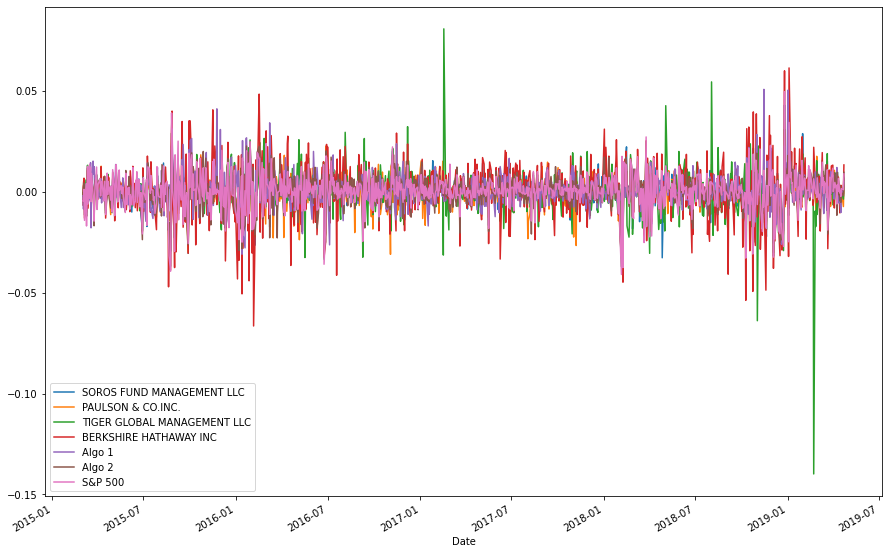

In [137]:
# Plot daily returns of all portfolios
daily_returns.plot(figsize=(15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns over the Last 3.5 Years'}, xlabel='Date'>

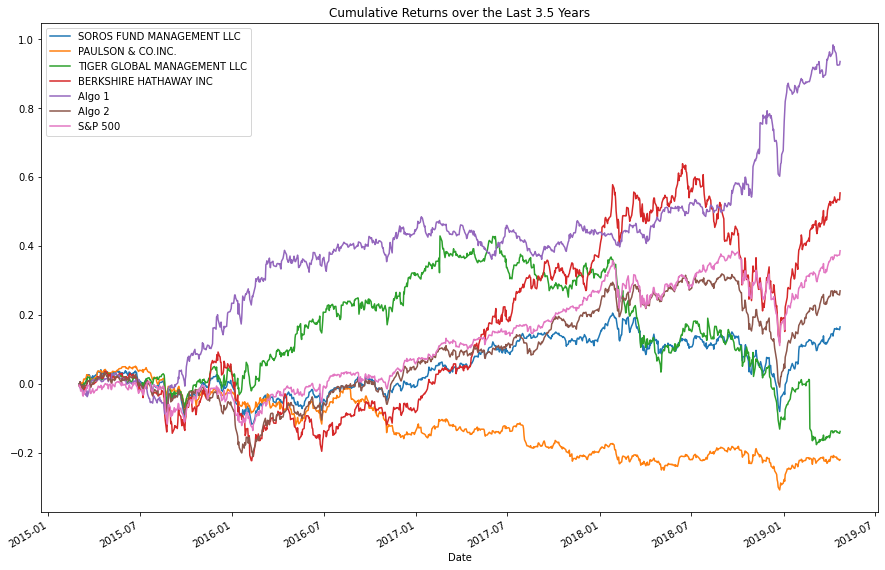

In [138]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10), title="Cumulative Returns over the Last 3.5 Years")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


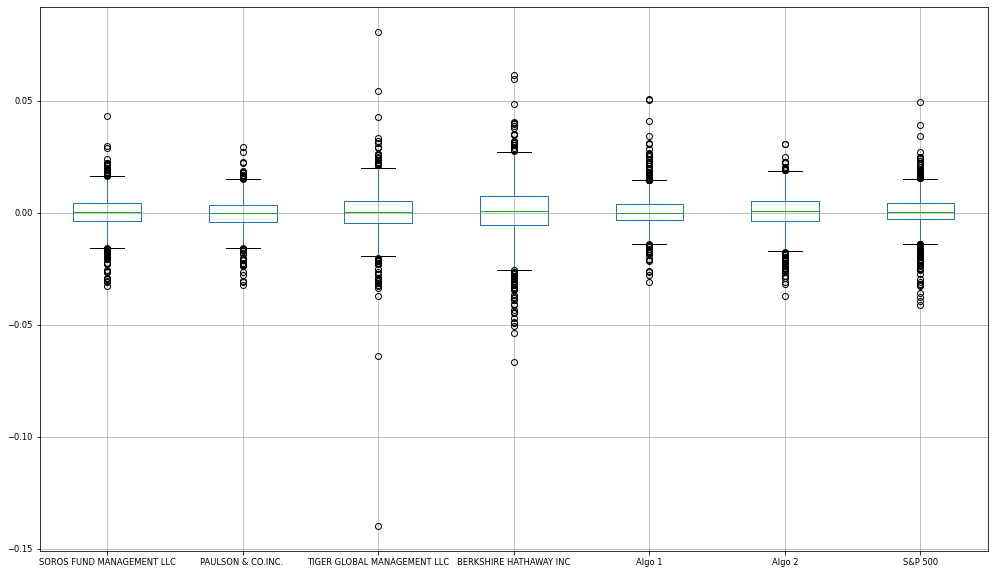

In [139]:
# Box plot to visually show risk
boxplot = daily_returns.boxplot(fontsize='small', figsize=(17,10))

### Calculate Standard Deviations

In [140]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [141]:
# Calculate the daily standard deviation of S&P 500
print(f'The daily standard deviation of S&P 500 is {daily_std["S&P 500"]}')
      
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

## BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC presents the higher risk than S&P 500

The daily standard deviation of S&P 500 is 0.008553731597758204


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
dtype: float64

### Calculate the Annualized Standard Deviation

In [142]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

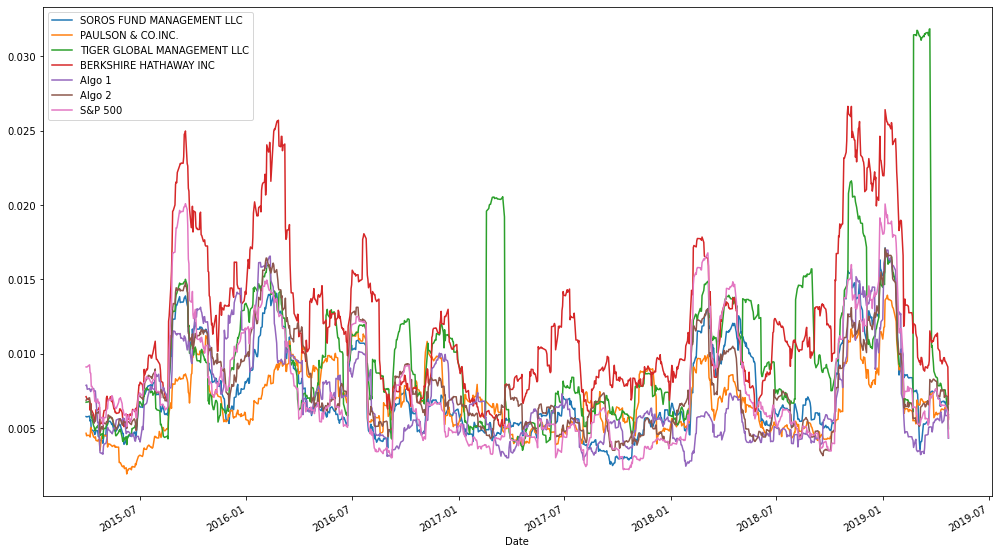

In [143]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_returns = daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_21_returns.plot(figsize=(17,10))

### Calculate and plot the correlation

<AxesSubplot:>

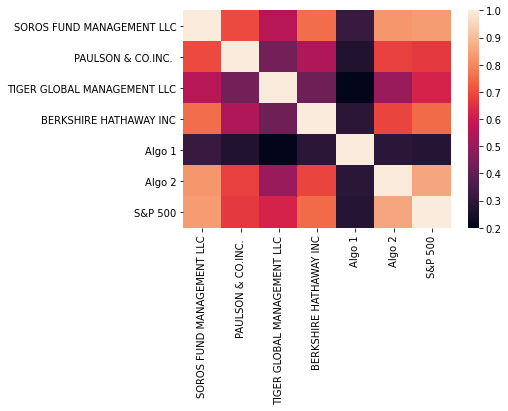

In [144]:
# Calculate the correlation
price_correlation = daily_returns.corr()

# Display de correlation matrix
sns.heatmap(price_correlation, vmin=0.2, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

The Covariance of Algo 1 vs S&P 500 is 1.8217749991632826e-05
The Variance of S&P 500 is 7.316632424648712e-05
The Beta is 0.24899091459425748


<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo 1'}, xlabel='Date'>

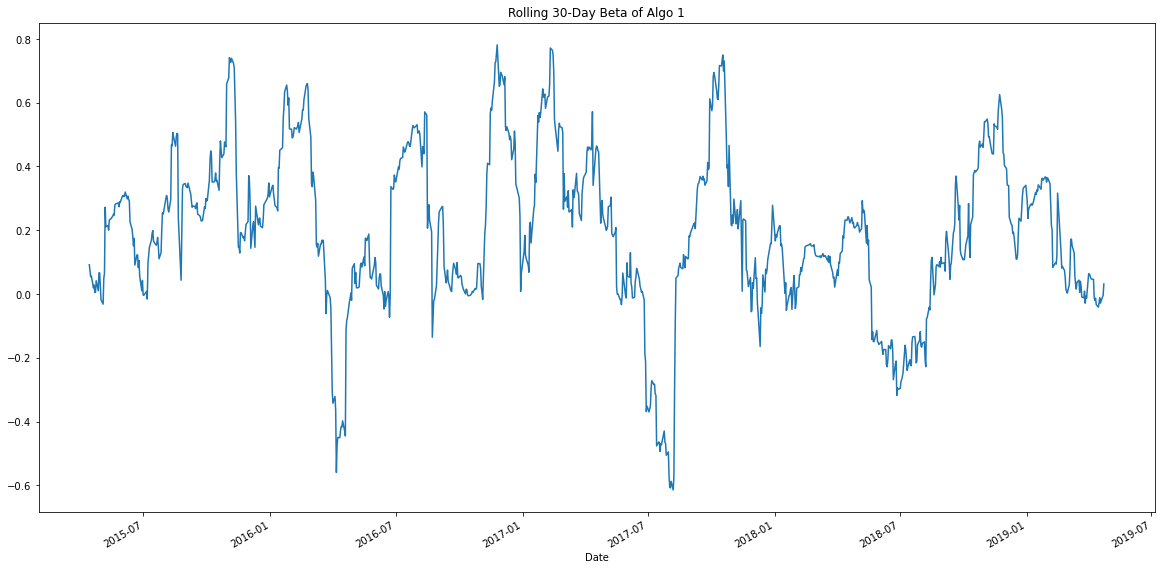

In [148]:
# Calculate covariance of a single portfolio
covariance = daily_returns['Algo 1'].cov(daily_returns['S&P 500'])
print(f'The Covariance of Algo 1 vs S&P 500 is {covariance}')

# Calculate variance of S&P 500
variance = daily_returns['S&P 500'].var()
print(f'The Variance of S&P 500 is {variance}')

# Computing beta
portfolio_beta = covariance / variance
print(f'The Beta is {portfolio_beta}')

# Plot beta trend ***(CHECK THIS)***



#rolling_algo1_covariance = daily_returns['Algo 1'].rolling(window=30).cov(daily_returns['S&P 500'])
# Calculate 30-day rolling variance of S&P 500
#rolling_variance = daily_returns['S&P 500'].rolling(window=30).var()
## Calculate 30-day rolling beta of Algo 1 and plot the data
#rolling_algo1_beta = rolling_algo1_covariance / rolling_variance
#rolling_algo1_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [151]:
# Use `ewm` to calculate the rolling window
# Calculate the rolling standard deviation for all portfolios using a 21-day window
ewm_rolling_returns = daily_returns.ewm(halflife='21 days', times=pd.DatetimeIndex(Date)).mean()

# Plot the rolling standard deviation
ewm_rolling_returns.plot(figsize=(17,10))

NameError: name 'Date' is not defined

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [152]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

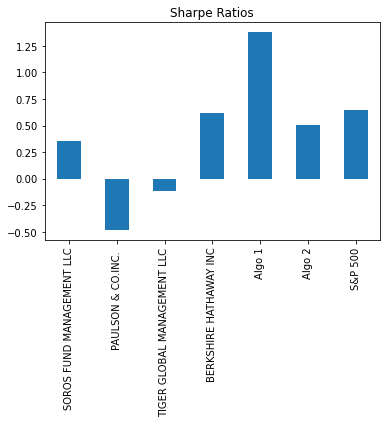

In [153]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 does outperform the S&P 500 and Whale portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# WU, YUM, CSCO, HOG, H
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!